In [1]:
from sympy.abc import x,y,z,t
from sympy import solve, exp, log, Matrix, simplify, factor, expand, limit, oo, re, im
from sympy.tensor.array import derive_by_array

from mpmath import findroot
import numpy as np

In [2]:
f = x**4 -4*x*y +y**4
gradient = derive_by_array(f, [x,y])

In [3]:
g0 = gradient.subs({x:1., y:-1.})
g0

[8.00000000000000, -8.00000000000000]

In [4]:
phi_0 = f.subs({x:1-t*g0[0], y:-1-t*g0[1]})
expand(phi_0)

8192.0*t**4 - 4096.0*t**3 + 1024.0*t**2 - 128.0*t + 6

In [5]:
# def mint(f):
#     df = derive_by_array(f,t)
#     end = limit(f, t, oo).evalf()
#     start = f.subs({t:0.})
# #     print("Start and End")
# #     print(start)
# #     print(end)
#     if end<start:
#         target = end
#         output = oo
#     else:
#         target = start
#         output = 0.
      
#     crits = [a.evalf() for a in solve(df) if (np.abs(im(a))<=np.epsilon and re(a)>=0)]
#     for a in crits:
#         target_v = f.subs({t:a})
#         if target_v < target:
#             output = a
#             target = target_v
#     return output

In [6]:
# mint(t-log(t))

In [7]:
# mint(phi_0)

In [8]:
def steepest2(f, x0, y0, steps, verbatim=False):
    output_str  = "\\begin{tabular}{|r|r|r|r|} \\hline \n"
    output_str += " $n$ & $x_n$ & $y_n$ & $f(x_n,y_n)$ \\\\ \\hline \\hline \n"
    output_str += "$0$ & $%1.6f$ & $%1.6f$ & $%1.6f$ \\\\ \\hline \n" % (x0, y0, f.subs({x:x0, y:y0}))
    gradient = derive_by_array(f, [x,y])
    outputx = [x0]
    outputy = [y0]
    for step in range(steps):
        g0 = gradient.subs({x:x0, y:y0})
        phi = f.subs({x: x0-t*g0[0], y: y0-t*g0[1]})
        if verbatim: 
            print(expand(phi))
#             print(solve(phi))
#         t0 = mint(phi)
        t0 = findroot(lambda s: phi.diff().subs({t:s}), 0)
#         print(t0)
        xn = x0 - t0*g0[0]
        yn = y0 - t0*g0[1]
        outputx.append(xn)
        outputy.append(yn)
        output_str += "$%d$ & $%1.6f$ & $%1.6f$ & $%1.6f$ \\\\ \\hline \n" % (step+1,xn,yn,f.subs({x:xn, y:yn}))
        x0,y0 = xn,yn
    output_str += "\\end{tabular}"
    return outputx, outputy, output_str

In [9]:
ox1,oy1,os = steepest2(f, -1.,1.,7,verbatim=True)
print(os)
ox1=ox1[:2]
oy1=oy1[:2]

8192.0*t**4 - 4096.0*t**3 + 1024.0*t**2 - 128.0*t + 6.0
0
0
0
0
0
0
\begin{tabular}{|r|r|r|r|} \hline 
 $n$ & $x_n$ & $y_n$ & $f(x_n,y_n)$ \\ \hline \hline 
$0$ & $-1.000000$ & $1.000000$ & $6.000000$ \\ \hline 
$1$ & $0.000000$ & $0.000000$ & $0.000000$ \\ \hline 
$2$ & $0.000000$ & $0.000000$ & $0.000000$ \\ \hline 
$3$ & $0.000000$ & $0.000000$ & $0.000000$ \\ \hline 
$4$ & $0.000000$ & $0.000000$ & $0.000000$ \\ \hline 
$5$ & $0.000000$ & $0.000000$ & $0.000000$ \\ \hline 
$6$ & $0.000000$ & $0.000000$ & $0.000000$ \\ \hline 
$7$ & $0.000000$ & $0.000000$ & $0.000000$ \\ \hline 
\end{tabular}


In [10]:
ox2,oy2,os = steepest2(f, 3.5,2.1,16)
print(os)
ox2=ox2[:16]
oy2=oy2[:16]

\begin{tabular}{|r|r|r|r|} \hline 
 $n$ & $x_n$ & $y_n$ & $f(x_n,y_n)$ \\ \hline \hline 
$0$ & $3.500000$ & $2.100000$ & $140.110600$ \\ \hline 
$1$ & $1.044472$ & $1.753064$ & $3.310777$ \\ \hline 
$2$ & $1.141931$ & $1.063276$ & $-1.878163$ \\ \hline 
$3$ & $1.008581$ & $1.044435$ & $-1.988879$ \\ \hline 
$4$ & $1.013966$ & $1.006319$ & $-1.998931$ \\ \hline 
$5$ & $1.000898$ & $1.004472$ & $-1.999891$ \\ \hline 
$6$ & $1.001437$ & $1.000651$ & $-1.999989$ \\ \hline 
$7$ & $1.000093$ & $1.000461$ & $-1.999999$ \\ \hline 
$8$ & $1.000149$ & $1.000067$ & $-2.000000$ \\ \hline 
$9$ & $1.000010$ & $1.000048$ & $-2.000000$ \\ \hline 
$10$ & $1.000015$ & $1.000007$ & $-2.000000$ \\ \hline 
$11$ & $1.000001$ & $1.000005$ & $-2.000000$ \\ \hline 
$12$ & $1.000002$ & $1.000001$ & $-2.000000$ \\ \hline 
$13$ & $1.000000$ & $1.000001$ & $-2.000000$ \\ \hline 
$14$ & $1.000000$ & $1.000000$ & $-2.000000$ \\ \hline 
$15$ & $1.000000$ & $1.000000$ & $-2.000000$ \\ \hline 
$16$ & $1.000000$ & $1.00

In [11]:
ox3,oy3,os = steepest2(f, -13.5,-7.3,2)
print(os)

\begin{tabular}{|r|r|r|r|} \hline 
 $n$ & $x_n$ & $y_n$ & $f(x_n,y_n)$ \\ \hline \hline 
$0$ & $-13.500000$ & $-7.300000$ & $35660.686600$ \\ \hline 
$1$ & $2.362722$ & $-4.871733$ & $640.498302$ \\ \hline 
$2$ & $1.434154$ & $1.194162$ & $-0.586492$ \\ \hline 
\end{tabular}


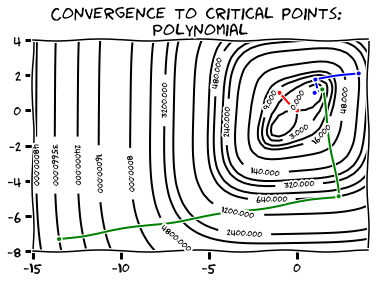

In [12]:
import numpy as np, matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.xkcd();

xx = np.linspace(-15,4)
yy = np.linspace(-8,4)
X,Y = np.meshgrid(xx,yy)

plt.figure()
plt.axes(aspect='equal')
CS = plt.contour(X, Y, X**4-4*X*Y+Y**4, levels=[0,3,9,16,48,140,240,320,480,640,1200,2400,3200,4800,8000,16000,24000,35660,48000], colors='k')
plt.clabel(CS, fontsize=9, inline=1)
plt.plot(ox1,oy1,'r')
plt.plot(ox1,oy1,'.r')
plt.plot(ox2,oy2,'b')
plt.plot(ox2,oy2,'.b')
plt.plot(ox3,oy3,'g')
plt.plot(ox3,oy3,'.g')
# plt.xlim(-4,4)
# plt.ylim(-4,4)
plt.title("Convergence to critical points: \nPolynomial")
plt.show()

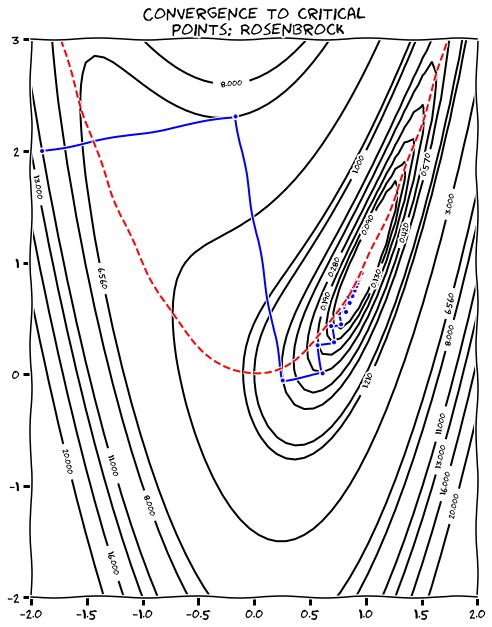

In [35]:
R = (1-x)**2+(y-x**2)**2
ox,oy,os = steepest2(R, -1.9, 2., 27)
# print(os)

xx = np.linspace(-2,2)
yy = np.linspace(-2,3)
X,Y = np.meshgrid(xx,yy)

plt.figure(figsize=(8,12))
# plt.figure()
plt.axes(aspect='equal')
CS = plt.contour(X, Y, (1-X)**2+(Y-X**2)**2, levels=[0.09,0.13,0.19,0.28,0.42,0.57,1,1.21,3,6.56,8,11,13,16,20], colors='k')
plt.clabel(CS, fontsize=9, inline=1)
plt.plot(ox,oy,'b')
plt.plot(ox,oy,'.b')
plt.plot(xx,xx**2,'--r')
plt.xlim(-2,2)
plt.ylim(-2,3)
plt.title("Convergence to critical\n points: Rosenbrock")
plt.show()

In [14]:
ox,oy,os = steepest2(R, 0., 0.5, 14)
print(os)

plt.figure()
plt.axes(aspect='equal')
CS = plt.contour(X, Y, (1-X)**2+(Y-X**2)**2, levels=[0,0.000002,0.000013,0.000095,0.000756,0.005383,0.1818,1.25,3,6,8,13,16,20], colors='k')
plt.clabel(CS, fontsize=9, inline=1)
plt.plot(ox,oy,'r')
plt.plot(ox,oy,'.r')
# plt.xlim(0.5,1.1)
# plt.ylim(0.5,1.1)
plt.title("Convergence to critical\n points: Done in 14 steps")
plt.show()

In [15]:
ox,oy,os = steepest2(R, -1.9, 2., 34)
print(os)

plt.figure()
plt.axes(aspect='equal')
CS = plt.contour(X, Y, (1-X)**2+(Y-X**2)**2, levels=[0.25,0.5,1,2,4,6,8,12,16,20], colors='k')
plt.clabel(CS, fontsize=9, inline=1)
plt.plot(ox,oy,'r')
plt.plot(ox,oy,'.r')
# plt.xlim(0.5,1.1)
# plt.ylim(0.5,1.1)
plt.title("Convergence to critical\n points: Rosenbrock")
plt.show()

In [16]:
f = 10*y**2+5*x*y+8*x**2-14*y-6*x+10

yy = np.linspace(-20,41)
xx = np.linspace(-101,20)
X,Y= np.meshgrid(xx,yy)

ox,oy,os = steepest2(f, -100., 40., 7)
print(os)

plt.figure(figsize=(12,6))
plt.axes(aspect='equal')
CS = plt.contour(X, Y, 10*Y**2+5*X*Y+8*X**2-14*Y-6*X+10, levels=[4,5,12,25,100,125,174,360,720,1200,2400,3591,4500,6000,12000,32000,50000,76050], colors='k')
plt.clabel(CS, fontsize=9, inline=1)
plt.plot(ox,oy,'r')
plt.plot(ox,oy,'.r')
# plt.xlim(-1,20)
# plt.ylim(-20,1)
plt.title("Convergence to critical\n points: Rosenbrock")
plt.show()

In [46]:
def steepest2up(f, x0, y0, steps, verbatim=False):
    output_str  = "\\begin{tabular}{|r|r|r|r|r|} \\hline \n"
    output_str += " $n$ & $x_n$ & $y_n$ & $f(x_n,y_n)$ & $\\boldsymbol{\\frac{f(x_n,y_n)}{f(x_{n-1},y_{n-1})}}$ \\\\ \\hline \\hline \n"
    output_str += "$0$ & $%1.10f$ & $%1.10f$ & $%1.10f$ &  \\\\ \\hline \n" % (x0, y0, f.subs({x:x0, y:y0}))
    gradient = derive_by_array(f, [x,y])
    outputx = [x0]
    outputy = [y0]
    for step in range(steps):
        g0 = gradient.subs({x:x0, y:y0})
        phi = f.subs({x: x0-t*g0[0], y: y0-t*g0[1]})
        if verbatim: 
            print(expand(phi))
#             print(solve(phi))
#         t0 = mint(phi)
        t0 = findroot(lambda s: phi.diff().subs({t:s}), 0)
#         print(t0)
        xn = x0 - t0*g0[0]
        yn = y0 - t0*g0[1]
        outputx.append(xn)
        outputy.append(yn)
        output_str += "$%d$ & $%1.10f$ & $%1.10f$ & $%1.10f$ & $\\boldsymbol{%1.10f}$ \\\\ \\hline \n" % (step+1,xn,yn,f.subs({x:xn, y:yn}),f.subs({x:xn, y:yn})/f.subs({x:x0, y:y0}))
        x0,y0 = xn,yn
    output_str += "\\end{tabular}"
    return outputx, outputy, output_str

In [51]:
f = 5*x**2 + 5*y**2 -x*y -11*x + 11*y +11

yy = np.linspace(-14,14)
xx = np.linspace(-14,14)
X,Y= np.meshgrid(xx,yy)

ox,oy,os = steepest2up(f, 1.5, 3.5, 9)
print(os)

plt.figure(figsize=(8,8))
plt.axes(aspect='equal')
CS = plt.contour(X, Y, 5*X**2 + 5*Y**2 -X*Y -11*X + 11*Y +11, colors='k')
plt.clabel(CS, fontsize=9, inline=1)
plt.plot(ox,oy,'r')
plt.plot(ox,oy,'.r')
# plt.xlim(-1,20)
# plt.ylim(-20,1)
plt.title("Convergence to critical\n points: Quadratic Function")
plt.show()